## Problema Concentlite

Para entrenar y probar el algoritmo utilice la base de datos $concentlite.csv$, que consiste en dos clases distribuidas en forma concéntrica como muestra la Figura 2. Represente gráficamente, con diferentes colores, el resultado de la clasificación realizada por el perceptrón multicapa.

### Train

In [ ]:
ds, M_tst, M_trn  =  generar_particiones('icgtp1datos\concentlite.csv', 1, 0.2)
X = ds[M_trn[0,:], :-1]
#X_a = np.array([[-1.0291,0.97256],[1.0325,-1.0188]])

# print(X)
Y_d = ds[M_trn[0,:], -1]
#Y_d = [1, 1]
# print(Y_d)
network = []
# X = np.hstack((-1, np.ones((X.shape[0],1)), X))
n_per_layer = np.array([3, 2, 1])
network = perceptron_multilayer_init(n_per_layer, X.shape[1])
#print(f'pesos capa 1{network[0].w}')
#print(f'pesos capa 2{network[1].w}')

cant_epocas = 400
nu_error = 0.01
error_epocas = []
gamma_aprend = 0.01
mse_epocas = []

for n_epoch in range(cant_epocas):
    for i, pattern in enumerate(X):
        #print('patron:', pattern)
        y = perceptron_multilayer_forward(network, pattern)
        #print(f'salida{i}={y}')
        grad = perceptron_multilayer_backward(network, y, Y_d[i])
        #print(f'gradiente = {grad}')
        network = perceptron_multilayer_update(network, y, grad, gamma_aprend)
    
    # Validación [con todos los patrones]
    errores = 0
    for n, patron in enumerate(X):
        # producto punto
        y_test = perceptron_multilayer_forward(network, patron)
        # estamos suponiendo una sola salida
        #y = -1 if (y_test[-1] < 0) else 1
        y_aux=0
        if (y_test[-1] < 0):
            y_aux=-1
        else:
            y_aux=1
        # print('y',y,'yDeseada',Y_d[n])
        errores += int(y_aux != Y_d[n])
        # print('errores', errores)}

        #cálculo del error cuadrático medio
        mse = np.sum(pow(np.subtract(y_test[-1], Y_d[n]), 2))
        
        # print(mse)
        mse_epoca = np.append(mse_epoca, mse)

    error = (errores/X.shape[0])
        # error = np.sum(((y[-1]-Y_d[i])**2))        
    error_epocas= np.append(error_epocas, [error])
    
    e_prom = np.mean(mse_epoca)
    mse_epocas = np.append(mse_epocas, e_prom)

    print(f'Epoca {n_epoch}: error = {error}')
    if (error < nu_error):
        # print(f'Época {n_epoch}')
        break
   
print(f'Epoca {n_epoch}: error = {error_epocas[-1]}')

### Test

In [ ]:
X_test = ds[M_tst[0,:], :-1]
Y_d_test = ds[M_tst[0,:], -1]
errores = 0
historial_y = []

for i, pattern in enumerate(X_test):
    y_test = perceptron_multilayer_forward(network, pattern)
    # print(y_test[-1])
    # estamos suponiendo una sola salida
    y = 0
    if (y_test[-1] < 0):
        y = -1
    else:
        y = 1
    historial_y = np.append(historial_y, y)
    if y != Y_d_test[i]:
        errores += 1

print(f'tasa de aciertos de test {(errores / X_test.shape[0])}')
#print(historial_y)


tasa de aciertos de test 0.3614457831325301


### Plot

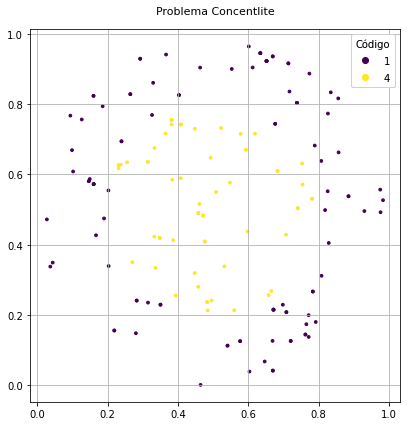

In [ ]:
fig1, fig1_ax = plt.subplots(figsize=(7, 6), tight_layout=True)
fig1.suptitle('Problema Concentlite',  fontsize=11)
fig1_ax.set_aspect('equal')
fig1_ax.grid()


# Patrones
x_x = X_test[:,0]
x_y = X_test[:,1]
c = np.zeros((len(historial_y)), 'int')

# Código de colores
# [1] = clase 1 - bien identificados
# [2] = clase 1 - mal identificados
# [3] = clase 2 - bien identificados
# [4] = clase 2 - mal identificados

x_color = np.array([])
for i in range(len(historial_y)):
    
    if historial_y[i] == 1 and Y_d_test[i] == 1:
        c[i] = 1
    elif historial_y[i] == - 1 and Y_d_test[i] == 1:
        c[i] = 2
    elif historial_y[i] == - 1 and Y_d_test[i] == - 1:
        c[i] = 3
    else:
        c[i] = 4

scat = fig1_ax.scatter(x_x, x_y, c=c, s=30, marker='.')
handles, labels = scat.legend_elements()
legend1 = fig1_ax.legend(handles,labels,
                    title="Código")
fig1_ax.add_artist(legend1)

plt.show()

### Término de momento

Verifique experimentalmente la influencia de la incorporación del término de momento en la ecuación de adaptación de los pesos. Para esto, modifique su implementación para incluir el término de momento y compare la velocidad de convergencia del algoritmo.

Término de momento: $\alpha \Delta w_{n-1}$

Ecuación de actualización de pesos: 
$$\Delta w^{II}_{n} = \mu \delta^{II} Y^{I} + \alpha \Delta w^{II}_{n-1}$$
$$ w^{II}_{n} = w_{n-1}^{II} + \Delta w_{n}^{II}$$

### Prueba con perceptrón simple

Convierta los patrones de $concentlite.csv$ a una sola dimensión, obtenida como la distancia euclídea de cada patrón a la media total. Entrene un perceptrónn simple con estos nuevos datos unidimensionales y compare los resultados obtenidos en los puntos anteriores.